<a href="https://colab.research.google.com/github/ProfAI/tf00/blob/master/4%20-%20Tensorflow%20Avanzato/callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Callbacks
I callback ci permettono di eseguire del codice durante le varie fasi dell'addestramento di una Rete Neurale. In questo notebook vedremo come utilizzarli.

## Importiamo i Moduli

In [ ]:
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from time import time

## Prepariamo i Dati

In [ ]:
dataset = tfds.load('mnist', split='train', shuffle_files=True)

def load_data(dataset, num_samples=None):
  images = []
  labels = []

  for i, example in enumerate(tfds.as_numpy(dataset)):

    if(num_samples!=None and i>=num_samples):
      break

    images.append(example["image"])
    labels.append(example["label"])

  images = np.array(images)
  labels = np.array(labels)

  return images, labels

images, labels = load_data(dataset)
num_classes = np.unique(labels).shape[0]

X = images
y = tf.one_hot(labels, num_classes).numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Costruiamo la Rete Neurale
Dato che dovremo addestrare la Rete più volte, definiamo una funzione che ci permette di definirla e compilarla.

In [ ]:
def build_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Lambda(lambda x: tf.reshape(x, [x.shape[0], x.shape[1]*x.shape[2]])))
  model.add(tf.keras.layers.Lambda(lambda x: x/255))
  model.add(tf.keras.layers.Dense(32, activation='relu'))
  model.add(tf.keras.layers.Dense(32, activation='relu'))
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

  return model

## Custom Callbacks
Un Custom Callback ci permette di eseguire del codice arbitrario durante la fase di addestramento. Per creare il nostro callback dobbiamo definire una nuova classe derivante dalla classe Callback di Keras, questa classe ha diversi metodi che ci permettono di eseguire del codice durante le varie fasi dell'addestramento, [qui](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback) puoi trovare l'elenco di tutti i metodi che puoi sfruttare.

In [ ]:
from time import time
from google.colab import output

class MyCustomCallback(tf.keras.callbacks.Callback):

  # Viene eseguito al termine di ogni epoca
  def on_epoch_end(self, epoch, logs=None):
    metrics_test = model.evaluate(X_test, y_test)
    print("Epoca %d: Test loss=%.4f, Test accuracy=%.2f" % (epoch+1, metrics_test[0], metrics_test[1]))

  # Viene eseguito all'avvio dell'addestramento 
  def on_train_begin(self, logs=None):
    print("Avvio dell'addestramento...")
    self.start_time = time()

  # Viene eseguito al termine dell'addestramento
  def on_train_end(self, logs=None):
    exec_time = time()-self.start_time
    print("\n+++ Addestramento completato in: %d minuti e %d secondi +++" % (exec_time/60, exec_time%60))
    output.eval_js('new Audio("https://raw.githubusercontent.com/ProfAI/tf00/master/gilfoyle_alert.mp3").play()') # avviamo un suono

ora possiamo passare un'istanza del callback all'interno del parametro callbacks del metodo fit.

In [ ]:
model = build_model()
model.fit(X_train, y_train, epochs=10, callbacks=[MyCustomCallback()])

Avvio dell'addestramento...
Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4156 - accuracy: 0.8863
Epoca 1: Test loss=0.4156, Test accuracy=0.89
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9276 - accuracy: 0.7275
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3222 - accuracy: 0.9072
Epoca 2: Test loss=0.3222, Test accuracy=0.91
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3474 - accuracy: 0.9007
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2770 - accuracy: 0.9198
Epoca 3: Test loss=0.2770, Test accuracy=0.92
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2870 - accuracy: 0.9163
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2540 - accuracy: 0.9243
Epoca 4: Test loss=0.2540, Test accuracy=0.92
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2548 - accuracy: 0.9260
Epoch 5/10
375/375 [====

## History Callbacks
Oltre ai Custom Callbacks, possiamo anche sfruttare dei callback che hanno delle funzioni predefinite. Uno di questi è l'History Callback, che ci permette ad accedere ai valori delle metriche ottenute al termine delle varie epoche.

In [ ]:
model = build_model()
model.fit(X_train, y_train, epochs=10, callbacks=[tf.keras.callbacks.History()])

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1629 - accuracy: 0.9528
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1560 - accuracy: 0.9550
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1494 - accuracy: 0.9561
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1438 - accuracy: 0.9586
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1384 - accuracy: 0.9592
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1338 - accuracy: 0.9613
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1290 - accuracy: 0.9621
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1252 - accuracy: 0.9634
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1213 - accuracy: 0.9651
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.117

Queste informazioni sono utili per mostrare graficamente l'evoluzione delle metriche durante l'addestramento.

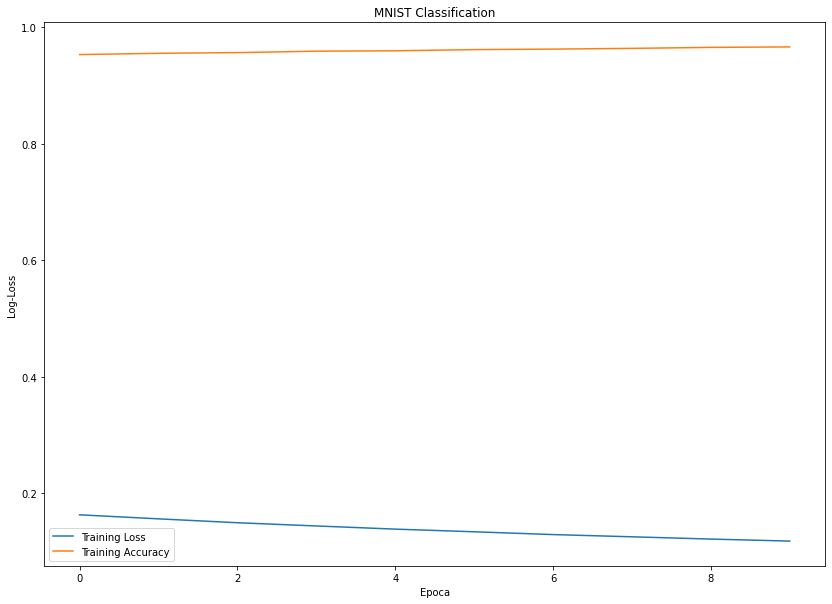

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plt.title("MNIST Classification")
plt.xlabel("Epoca")
plt.ylabel("Log-Loss")
  
plt.plot(model.history.history['loss'], label="Training Loss")
plt.plot(model.history.history['accuracy'], label="Training Accuracy")
plt.legend()
plt.show()

## Early Stopping Callbacks
Early Stopping è una tecnica che consiste nell'interrompere l'addestramento in maniera preventiva se il modello non sta migliorando.

In [ ]:
model = build_model()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                              min_delta=0.01,
                              patience=2,
                              restore_best_weight=True)

model.fit(X_train, y_train, epochs=10, callbacks=[early_stopping])

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8740 - accuracy: 0.7583
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3474 - accuracy: 0.8996
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2888 - accuracy: 0.9166
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2548 - accuracy: 0.9259
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2309 - accuracy: 0.9329
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2118 - accuracy: 0.9379
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1961 - accuracy: 0.9429


Così facendo abbiamo indicato di interrompere l'addestramento se dopo almeno *patience* epoche il valore della *loss* non è migliorato di almeno *min_delta*, e in tal caso di ripristinare i pesi che hanno portato al migliore risultato.

## Model Checkpoint Callbacks
I checkpoint sono uno strumento estremamente utile, che ci permette di fare un backup su disco della rete neurale al termine di ogni epoca, o di un'altro intervallo temporale definito da noi.

In [ ]:
model = build_model()

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "checkpoint.h5", 
    monitor='loss', 
    save_best_only=True,
    #save_weights_only=False, 
    #save_freq='epoch'
)

model.fit(X_train, y_train, epochs=10, callbacks=[model_checkpoint])

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8580 - accuracy: 0.7634
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3607 - accuracy: 0.8960
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3059 - accuracy: 0.9119
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2752 - accuracy: 0.9213
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2521 - accuracy: 0.9279
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2331 - accuracy: 0.9331
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2172 - accuracy: 0.9385
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2028 - accuracy: 0.9416
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1906 - accuracy: 0.9453
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.179

La rete viene salvata con formato h5, nel prossimo notebook vedremo come ripristinarla.

## Utilizzare più Callbacks
Come avrai notato, l'input dell parametro *callbacks* deve essere una lista di callback, infatti possiamo utilizzare anche più callback, custom e/o predefiniti, durante l'addestramento, per una lista estensiva di tutti i callback disponibili puoi far rifermento alla documentazione di Tensorflow.
<br>
[Tutti i Callback di tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks])